In [1]:
# ============================================================
# 1) SETUP & BASIS-DATEN LADEN (btc_clean.csv)
# ============================================================

import pandas as pd
from pathlib import Path

# ------------------------------------------------------------
# 1.1) Projekt-Root automatisch finden (über .git)
#     → Funktion durchsucht alle Elternordner bis zur Projektwurzel
# ------------------------------------------------------------
def find_project_root(start_path: Path = Path.cwd()):
    for parent in [start_path] + list(start_path.parents):
        if (parent / ".git").exists():
            return parent
    raise FileNotFoundError("❌ Projekt-Root nicht gefunden ('.git' fehlt).")

# 🎯 Projektwurzel bestimmen
PROJECT_ROOT = find_project_root()
print("📂 PROJECT_ROOT =", PROJECT_ROOT)

# 📂 Pfad zu unseren verarbeiteten Daten
DATA_DIR = PROJECT_ROOT / "data" / "processed"
print("📂 DATA_DIR =", DATA_DIR)

# ------------------------------------------------------------
# 1.2) btc_clean.csv laden – Hauptdatensatz mit allen Features
# ------------------------------------------------------------
path_clean = DATA_DIR / "btc_clean.csv"

print("\n🔎 Erwartete Datei:", path_clean)
print("   Existiert die Datei?", path_clean.exists())

if not path_clean.exists():
    raise FileNotFoundError(f"❌ btc_clean.csv nicht gefunden unter: {path_clean}")

# CSV laden
df_base = pd.read_csv(path_clean)
print("\n✅ btc_clean.csv erfolgreich geladen!")
print("   Shape (Zeilen, Spalten):", df_base.shape)

print("\n👀 Erste 5 Zeilen (df_base):")
display(df_base.head())

print("\n🔍 Datentypen in df_base:")
print(df_base.dtypes)


📂 PROJECT_ROOT = /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science
📂 DATA_DIR = /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/data/processed

🔎 Erwartete Datei: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/data/processed/btc_clean.csv
   Existiert die Datei? True

✅ btc_clean.csv erfolgreich geladen!
   Shape (Zeilen, Spalten): (4090, 13)

👀 Erste 5 Zeilen (df_base):


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,NaN,NaN,NaN



🔍 Datentypen in df_base:
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Return          float64
MA7             float64
MA21            float64
MA50            float64
MA200           float64
Volatility30    float64
Momentum7       float64
dtype: object


In [2]:
# ============================================================
# 1b) Date-Spalte in echtes Datumsformat umwandeln
# ============================================================

# String → datetime, ungültige Werte werden zu NaT (Not-a-Time)
df_base["Date"] = pd.to_datetime(df_base["Date"], errors="coerce")  # Kommentar: konvertiert die Spalte 'Date'

# Noch einmal kurz prüfen
print("📅 Datentyp von df_base['Date'] nach Konvertierung:", df_base["Date"].dtype)

print("\n👀 Erste 5 Zeilen nach Datums-Konvertierung:")
display(df_base.head())
print(df_base.dtypes)

📅 Datentyp von df_base['Date'] nach Konvertierung: datetime64[ns]

👀 Erste 5 Zeilen nach Datums-Konvertierung:


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,NaN,NaN,NaN


Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Return                 float64
MA7                    float64
MA21                   float64
MA50                   float64
MA200                  float64
Volatility30           float64
Momentum7              float64
dtype: object


In [3]:
# ============================================================
# BLOCK 2: Clustering-Daten laden (btc_clusters.csv)
# und mit df_base mergen
# ============================================================

import pandas as pd
from pathlib import Path

# ------------------------------------------------------------
# 2.1) Pfad setzen
# ------------------------------------------------------------
path_clusters = DATA_DIR / "btc_clusters.csv"   # Kommentar: Datei mit Cluster-Labeln

print("🔎 Lade Cluster-Datei:", path_clusters)
print("   Existiert die Datei?", path_clusters.exists())

if not path_clusters.exists():
    raise FileNotFoundError(f"btc_clusters.csv wurde nicht gefunden unter: {path_clusters}")

# ------------------------------------------------------------
# 2.2) CSV laden
# ------------------------------------------------------------
df_clusters = pd.read_csv(path_clusters)   # Kommentar: Datei in DataFrame laden

print("\n✅ btc_clusters.csv geladen")
print("   Shape:", df_clusters.shape)

print("\n👀 Erste 5 Zeilen (df_clusters):")
display(df_clusters.head())

# ------------------------------------------------------------
# 2.3) Datum konvertieren, falls noch String ist
# ------------------------------------------------------------
df_clusters["Date"] = pd.to_datetime(df_clusters["Date"], errors="coerce")
print("\n📅 Datentyp von df_clusters['Date']:", df_clusters["Date"].dtype)

# ------------------------------------------------------------
# 2.4) Merge mit df_base (inner join nach Date)
# ------------------------------------------------------------
df_master = df_base.merge(df_clusters, on="Date", how="left")
# Kommentar: "left" = alle Zeilen von df_base behalten, Cluster-Spalte anhängen

print("\n🧩 Merge abgeschlossen!")
print("   Neues Shape:", df_master.shape)

print("\n👀 Vorschau df_master (mit Cluster):")
display(df_master.head())


🔎 Lade Cluster-Datei: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/data/processed/btc_clusters.csv
   Existiert die Datei? True

✅ btc_clusters.csv geladen
   Shape: (3891, 15)

👀 Erste 5 Zeilen (df_clusters):


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Cluster_3,Regime
0,2015-04-04,254.291000,255.257996,251.100006,253.697006,12493500,-0.002458,248.965574,258.052477,259.574362,310.84317,0.030602,0.005010,0,Bull
1,2015-04-05,253.761002,260.674988,251.942001,260.597992,19649200,0.027202,251.520573,256.824143,259.639901,309.85949,0.031004,0.072105,0,Bull
2,2015-04-06,260.721008,261.798004,254.574997,255.492004,20034200,-0.019593,252.658574,255.152668,260.053241,309.01475,0.031067,0.032682,0,Bull
3,2015-04-07,255.274002,255.804993,252.205002,253.179993,18467400,-0.009049,253.938001,253.613382,260.439981,308.30667,0.031081,0.036972,0,Bull
4,2015-04-08,253.063995,253.847000,244.214996,245.022003,30086400,-0.032222,253.616573,253.076381,260.468221,307.48726,0.029548,-0.007730,0,Bull



📅 Datentyp von df_clusters['Date']: datetime64[ns]

🧩 Merge abgeschlossen!
   Neues Shape: (4090, 27)

👀 Vorschau df_master (mit Cluster):


,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Return_x,MA7_x,MA21_x,MA50_x,...,Volume_y,Return_y,MA7_y,MA21_y,MA50_y,MA200_y,Volatility30_y,Momentum7_y,Cluster_3,Regime
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ============================================================
# 2a) Cluster / Regime sauber an Basisdaten anhängen
# ============================================================

# Wir brauchen aus df_clusters nur die zusätzlichen Infos:
# - Date      : Join-Key
# - Cluster_3 : numerisches Cluster
# - Regime    : Bull / Bear / Sideways
cluster_merge_cols = ["Date", "Cluster_3", "Regime"]   # Kommentar: nur diese 3 Spalten übernehmen

# Sicherheitscheck: gibt es alle Spalten in df_clusters?
print("🔎 Spalten in df_clusters:", list(df_clusters.columns))

missing_cols = [c for c in cluster_merge_cols if c not in df_clusters.columns]
if missing_cols:
    raise KeyError(f"Diese Spalten fehlen in df_clusters: {missing_cols}")

# Nur die relevanten Spalten auswählen
df_clusters_small = df_clusters[cluster_merge_cols].copy()  # Kommentar: kleines, schlankes Cluster-DF

print("\n✅ df_clusters_small vorbereitet:")
print("   Shape:", df_clusters_small.shape)
display(df_clusters_small.head())

# Jetzt Merge: Basisdaten (df_base) + Cluster-Infos (df_clusters_small)
# Join über 'Date', left join = alle Zeilen aus df_base bleiben erhalten
df_master = df_base.merge(
    df_clusters_small,
    on="Date",
    how="left"          # Kommentar: falls es für ein Datum kein Cluster gibt → NaN in Cluster_3/Regime
)

print("\n🧩 Merge abgeschlossen!")
print("   Neues Shape df_master:", df_master.shape)

print("\n👀 Vorschau df_master (erste 5 Zeilen):")
display(df_master.head())

print("\n📊 Datentypen in df_master:")
print(df_master.dtypes)


🔎 Spalten in df_clusters: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7', 'Cluster_3', 'Regime']

✅ df_clusters_small vorbereitet:
   Shape: (3891, 3)


,Date,Cluster_3,Regime
0,2015-04-04,0,Bull
1,2015-04-05,0,Bull
2,2015-04-06,0,Bull
3,2015-04-07,0,Bull
4,2015-04-08,0,Bull



🧩 Merge abgeschlossen!
   Neues Shape df_master: (4090, 15)

👀 Vorschau df_master (erste 5 Zeilen):


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Cluster_3,Regime
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📊 Datentypen in df_master:
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Return                 float64
MA7                    float64
MA21                   float64
MA50                   float64
MA200                  float64
Volatility30           float64
Momentum7              float64
Cluster_3              float64
Regime                  object
dtype: object


In [5]:
# ============================================================
# 2b) Cluster / Regime prüfen
# ============================================================

print("👀 Kopf mit Cluster/Regime:")
display(df_master[["Date", "Close", "Cluster_3", "Regime"]].head(15))  # Kommentar: erste 15 Zeilen

print("\n👀 Ende mit Cluster/Regime:")
display(df_master[["Date", "Close", "Cluster_3", "Regime"]].tail(15))  # Kommentar: letzte 15 Zeilen

print("\n📊 Anteil fehlender Werte in Cluster_3 / Regime:")
nan_share = df_master[["Cluster_3", "Regime"]].isna().mean()          # Kommentar: True/False → Anteil NaN
print(nan_share)


👀 Kopf mit Cluster/Regime:


,Date,Close,Cluster_3,Regime
0,2014-09-17,457.334015,NaN,NaN
1,2014-09-18,424.440002,NaN,NaN
2,2014-09-19,394.795990,NaN,NaN
3,2014-09-20,408.903992,NaN,NaN
4,2014-09-21,398.821014,NaN,NaN
5,2014-09-22,402.152008,NaN,NaN
6,2014-09-23,435.790985,NaN,NaN
7,2014-09-24,423.204987,NaN,NaN
8,2014-09-25,411.574005,NaN,NaN
9,2014-09-26,404.424988,NaN,NaN



👀 Ende mit Cluster/Regime:


,Date,Close,Cluster_3,Regime
4075,2025-11-13,99697.492188,1.0,Sideways
4076,2025-11-14,94397.789062,1.0,Sideways
4077,2025-11-15,95549.148438,1.0,Sideways
4078,2025-11-16,94177.078125,1.0,Sideways
4079,2025-11-17,92093.875000,1.0,Sideways
4080,2025-11-18,92948.875000,1.0,Sideways
4081,2025-11-19,91465.992188,1.0,Sideways
4082,2025-11-20,86631.898438,1.0,Sideways
4083,2025-11-21,85090.687500,1.0,Sideways
4084,2025-11-22,84648.359375,1.0,Sideways



📊 Anteil fehlender Werte in Cluster_3 / Regime:
Cluster_3    0.048655
Regime       0.048655
dtype: float64


In [6]:
PROJECT_ROOT = find_project_root()
DATA_DIR = PROJECT_ROOT / "data" / "processed"


In [7]:
from pathlib import Path

# Projekt root ist schon definiert durch find_project_root()
DIRECTION_DIR = PROJECT_ROOT / "models" / "direction"

print("📂 DIRECTION_DIR =", DIRECTION_DIR)
print("📄 direction_model_metrics.csv existiert?",
      (DIRECTION_DIR / "direction_model_metrics.csv").exists())


📂 DIRECTION_DIR = /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/direction
📄 direction_model_metrics.csv existiert? True


In [8]:
import pandas as pd

df_direction_metrics = pd.read_csv(DIRECTION_DIR / "direction_model_metrics.csv")
df_direction_metrics.head()


,Modell,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.523136,0.518349,0.858228,0.646330
1,SVM,0.507712,0.510000,0.774684,0.615075
2,RandomForest,0.501285,0.508121,0.554430,0.530266
3,KNN,0.505141,0.511062,0.584810,0.545455
4,GradientBoosting,0.496144,0.502982,0.640506,0.563474


In [9]:
# ============================================================
# 3a) Direction-Model-Metriken laden
# ============================================================

# Pfad zum Direction-Modell-Ordner
DIRECTION_DIR = PROJECT_ROOT / "models" / "direction"

print("📂 DIRECTION_DIR =", DIRECTION_DIR)

metrics_path = DIRECTION_DIR / "direction_model_metrics.csv"
print("📄 direction_model_metrics.csv existiert?", metrics_path.exists())

if not metrics_path.exists():
    raise FileNotFoundError(f"❌ direction_model_metrics.csv nicht gefunden unter: {metrics_path}")

# CSV laden
df_direction_metrics = pd.read_csv(metrics_path)

print("\n✅ direction_model_metrics.csv geladen")
display(df_direction_metrics.head())


📂 DIRECTION_DIR = /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/direction
📄 direction_model_metrics.csv existiert? True

✅ direction_model_metrics.csv geladen


,Modell,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.523136,0.518349,0.858228,0.646330
1,SVM,0.507712,0.510000,0.774684,0.615075
2,RandomForest,0.501285,0.508121,0.554430,0.530266
3,KNN,0.505141,0.511062,0.584810,0.545455
4,GradientBoosting,0.496144,0.502982,0.640506,0.563474


In [10]:
# ============================================================
# 3b) Bestes Direction-Modell nach F1 bestimmen
# ============================================================

# 1) Nach F1 sortieren (absteigend) und erste Zeile nehmen
best_row = df_direction_metrics.sort_values("F1", ascending=False).iloc[0]  # höchste F1

# 2) Modellnamen und Kennzahlen rausziehen
best_direction_model_name = best_row["Modell"]   # z.B. "LogisticRegression"
best_direction_f1        = best_row["F1"]
best_direction_acc       = best_row["Accuracy"]

print("🏆 Bestes Direction-Modell (nach F1):", best_direction_model_name)
print("   F1-Score :", best_direction_f1)
print("   Accuracy :", best_direction_acc)


🏆 Bestes Direction-Modell (nach F1): LogisticRegression
   F1-Score : 0.646329837940896
   Accuracy : 0.5231362467866324


In [11]:
path_view = DATA_DIR / "btc_view.csv"

print("\n📄 Lade btc_view.csv aus:", path_view)
print("   Existiert die Datei?", path_view.exists())

if not path_view.exists():
    raise FileNotFoundError(f"❌ btc_view.csv nicht gefunden unter: {path_view}")

df_view = pd.read_csv(path_view)
print("✅ btc_view.csv geladen!")



📄 Lade btc_view.csv aus: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/data/processed/btc_view.csv
   Existiert die Datei? True
✅ btc_view.csv geladen!


In [12]:
# ============================================================
# 4b) Direction-Modell laden und Vorhersagen für alle Tage berechnen
# ============================================================

import joblib
import numpy as np

# ❗ Hier wählst du das Modell, das du verwenden willst
#    (Name muss genau wie in den joblib-Dateien heißen)
chosen_direction_model = "LogisticRegression"   # oder "SVM", "RandomForest", "KNN", ...

print("⚙️ Verwendetes Direction-Modell:", chosen_direction_model)

# Pfad zu models/direction (hast du schon vorher definiert)
print("📁 DIRECTION_DIR:", DIRECTION_DIR)

model_path = DIRECTION_DIR / f"direction_{chosen_direction_model}.joblib"
print("📄 Erwarte Modell-Datei:", model_path)
print("   Existiert Datei?", model_path.exists())

if not model_path.exists():
    raise FileNotFoundError(f"Modell-Datei nicht gefunden unter: {model_path}")

# Bundle laden: Model + Scaler + Featureliste
bundle = joblib.load(model_path)

direction_model = bundle["model"]
direction_scaler = bundle.get("scaler", None)
direction_features = bundle["features"]

print("\n📎 Features, die das Modell erwartet:")
print(direction_features)


⚙️ Verwendetes Direction-Modell: LogisticRegression
📁 DIRECTION_DIR: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/direction
📄 Erwarte Modell-Datei: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/direction/direction_LogisticRegression.joblib
   Existiert Datei? True

📎 Features, die das Modell erwartet:
['Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']


In [13]:
print("🔍 Anteil NaNs in Direction-Features:")
print(df_view[direction_features].isna().mean())


🔍 Anteil NaNs in Direction-Features:
Close           0.000000
Volume          0.000000
Return          0.000244
MA7             0.001467
MA21            0.004890
MA50            0.011980
MA200           0.048655
Volatility30    0.007335
Momentum7       0.001711
dtype: float64


In [14]:
# ============================================================
# 4c) Direction-Predictions für die komplette Historie erzeugen
# ============================================================

# 1) Nur die gültigen Zeilen behalten (keine NaNs in Features)
mask_valid = df_view[direction_features].notna().all(axis=1)

print("\n✅ Gültige Zeilen für das Direction-Modell:", mask_valid.sum())
print("❌ Zeilen mit NaNs (werden für die Vorhersage ignoriert):", (~mask_valid).sum())

X_valid = df_view.loc[mask_valid, direction_features]

# 2) In NumPy-Array umwandeln
X_valid_values = X_valid.values

# 3) Falls ein Scaler im Bundle war → anwenden
if direction_scaler is not None:
    print("\n📏 Wende gespeicherten Scaler auf die Features an …")
    X_scaled = direction_scaler.transform(X_valid_values)
else:
    print("\n⚠️ Kein Scaler im Bundle gefunden – verwende rohe Werte.")
    X_scaled = X_valid_values

# 4) Vorhersagen berechnen (0/1: Down/Up)
y_pred = direction_model.predict(X_scaled)

# 5) Optional: Wahrscheinlichkeit für "Up" berechnen (falls Modell proba kann)
prob_up = None
if hasattr(direction_model, "predict_proba"):
    proba = direction_model.predict_proba(X_scaled)
    # Annahme: Klasse 1 = "Up"
    prob_up = proba[:, 1]

# 6) Predictions in df_view schreiben (NaN für ungültige Zeilen)
df_view["Direction_Pred"] = pd.NA
df_view.loc[mask_valid, "Direction_Pred"] = y_pred

if prob_up is not None:
    df_view["Prob_Up"] = pd.NA
    df_view.loc[mask_valid, "Prob_Up"] = prob_up

print("\n👀 Vorschau df_view mit Direction-Vorhersagen:")
display(df_view.tail())



✅ Gültige Zeilen für das Direction-Modell: 3891
❌ Zeilen mit NaNs (werden für die Vorhersage ignoriert): 199

📏 Wende gespeicherten Scaler auf die Features an …

👀 Vorschau df_view mit Direction-Vorhersagen:


/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Direction_Pred,Prob_Up
4085,2025-11-23,84648.61,88038.47,84641.77,86805.01,58083435576,0.0255,88526.39,97041.37,106223.97,110210.50,0.0228,-0.0792,0,0.464278
4086,2025-11-24,86798.77,89206.34,85272.20,88270.56,74433896110,0.0169,87980.20,96171.04,105519.12,110135.65,0.0231,-0.0401,0,0.45889
4087,2025-11-25,88269.96,88457.34,86131.43,87341.89,64837343545,-0.0105,87179.20,95492.53,104770.90,110057.50,0.0223,-0.0600,0,0.484833
4088,2025-11-26,87345.59,90581.16,86316.90,90518.37,66496301869,0.0364,87043.82,94855.70,104152.24,109986.61,0.0237,-0.0076,0,0.441803
4089,2025-11-27,90507.97,91836.62,90193.34,91604.49,73517547520,0.0120,87754.20,94393.95,103517.24,109924.10,0.0240,0.0572,0,0.456849


In [16]:
# ============================================================
# 4c) Kleines Direction-DataFrame aus df_view bauen
# ============================================================

# Basis: wir brauchen mindestens Date + Direction_Pred
cols = ["Date", "Direction_Pred"]

# Falls Prob_Up existiert, hängen wir sie mit dran
if "Prob_Up" in df_view.columns:
    cols.append("Prob_Up")

df_direction_small = (
    df_view[cols]
    .dropna(subset=["Direction_Pred"])  # nur Zeilen, wo wirklich eine Vorhersage existiert
    .copy()
)

print("👀 Vorschau df_direction_small:")
display(df_direction_small.head())

print("\n📊 dtypes in df_direction_small:")
print(df_direction_small.dtypes)


👀 Vorschau df_direction_small:


,Date,Direction_Pred,Prob_Up
199,2015-04-04,1,0.561076
200,2015-04-05,1,0.542426
201,2015-04-06,1,0.575194
202,2015-04-07,1,0.567519
203,2015-04-08,1,0.583335



📊 dtypes in df_direction_small:
Date              object
Direction_Pred    object
Prob_Up           object
dtype: object


In [17]:
# ============================================================
# 4d) Date-Typen angleichen und mit df_master mergen
# ============================================================

# Stelle sicher, dass beide Date-Spalten datetime64 sind
df_master["Date"] = pd.to_datetime(df_master["Date"], errors="coerce")
df_direction_small["Date"] = pd.to_datetime(df_direction_small["Date"], errors="coerce")

print("df_master['Date'] dtype:", df_master["Date"].dtype)
print("df_direction_small['Date'] dtype:", df_direction_small["Date"].dtype)

# Merge: Basis + Direction-Predictions über Date
df_master = df_master.merge(
    df_direction_small,
    on="Date",
    how="left"  # alle Zeilen aus df_master bleiben, Vorhersagen werden zugefügt
)

print("\n✅ df_master mit Direction-Vorhersagen erweitert!")
print("Shape:", df_master.shape)
display(df_master.tail())


df_master['Date'] dtype: datetime64[ns]
df_direction_small['Date'] dtype: datetime64[ns]

✅ df_master mit Direction-Vorhersagen erweitert!
Shape: (4090, 17)


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Cluster_3,Regime,Direction_Pred,Prob_Up
4085,2025-11-23,84648.609375,88038.468750,84641.773438,86805.007812,58083435576,0.025478,88526.385045,97041.370908,106223.974687,110210.500117,0.022782,-0.079152,1.0,Sideways,0,0.464278
4086,2025-11-24,86798.773438,89206.335938,85272.195312,88270.562500,74433896110,0.016883,87980.197545,96171.039435,105519.116406,110135.645625,0.023106,-0.040149,1.0,Sideways,0,0.45889
4087,2025-11-25,88269.960938,88457.335938,86131.429688,87341.890625,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,110057.500820,0.022258,-0.059953,1.0,Sideways,0,0.484833
4088,2025-11-26,87345.585938,90581.156250,86316.898438,90518.367188,66496301869,0.036368,87043.824777,94855.701265,104152.243281,109986.611016,0.023721,-0.007631,1.0,Sideways,0,0.441803
4089,2025-11-27,90507.968750,91836.625000,90193.335938,91604.492188,73517547520,0.011999,87754.195312,94393.949033,103517.235781,109924.101680,0.023976,0.057219,1.0,Sideways,0,0.456849


In [18]:
print(df_master.columns)
display(df_master.tail())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7',
       'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7', 'Cluster_3',
       'Regime', 'Direction_Pred', 'Prob_Up'],
      dtype='object')


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Cluster_3,Regime,Direction_Pred,Prob_Up
4085,2025-11-23,84648.609375,88038.468750,84641.773438,86805.007812,58083435576,0.025478,88526.385045,97041.370908,106223.974687,110210.500117,0.022782,-0.079152,1.0,Sideways,0,0.464278
4086,2025-11-24,86798.773438,89206.335938,85272.195312,88270.562500,74433896110,0.016883,87980.197545,96171.039435,105519.116406,110135.645625,0.023106,-0.040149,1.0,Sideways,0,0.45889
4087,2025-11-25,88269.960938,88457.335938,86131.429688,87341.890625,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,110057.500820,0.022258,-0.059953,1.0,Sideways,0,0.484833
4088,2025-11-26,87345.585938,90581.156250,86316.898438,90518.367188,66496301869,0.036368,87043.824777,94855.701265,104152.243281,109986.611016,0.023721,-0.007631,1.0,Sideways,0,0.441803
4089,2025-11-27,90507.968750,91836.625000,90193.335938,91604.492188,73517547520,0.011999,87754.195312,94393.949033,103517.235781,109924.101680,0.023976,0.057219,1.0,Sideways,0,0.456849


In [20]:
df_master["Signal"] = df_master["Direction_Pred"].map({
    1: "📈 Up",
    0: "📉 Down"
}).fillna("⏸️ No Signal")

display(df_master[["Date", "Close", "Direction_Pred", "Prob_Up", "Signal"]].tail())


,Date,Close,Direction_Pred,Prob_Up,Signal
4085,2025-11-23,86805.007812,0,0.464278,📉 Down
4086,2025-11-24,88270.562500,0,0.45889,📉 Down
4087,2025-11-25,87341.890625,0,0.484833,📉 Down
4088,2025-11-26,90518.367188,0,0.441803,📉 Down
4089,2025-11-27,91604.492188,0,0.456849,📉 Down


In [22]:
# ============================================================
# 5a) Price-Metriken laden
# ============================================================
import pandas as pd
from pathlib import Path

price_metrics_path = DATA_DIR / "price_daily_model_metrics.csv"

print("📄 Lade Price-Metriken aus:", price_metrics_path)
print("   Existiert Datei?", price_metrics_path.exists())

df_price_metrics = pd.read_csv(price_metrics_path)
display(df_price_metrics.head())
print("\n🔎 Spalten:", df_price_metrics.columns.tolist())
print("🔎 Horizons:", df_price_metrics["horizon"].unique())


📄 Lade Price-Metriken aus: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/data/processed/price_daily_model_metrics.csv
   Existiert Datei? True


,horizon,model,mse,rmse,mae,r2
0,1d,naive,1.782175e+06,1334.981454,838.069975,0.995162
1,1d,ridge,1.795340e+06,1339.903127,837.672989,0.995126
2,1d,elasticnet,1.804209e+06,1343.208579,839.768849,0.995102
3,1d,lasso,1.813280e+06,1346.580907,846.092577,0.995077
4,1d,linear,1.820277e+06,1349.176261,847.170249,0.995058



🔎 Spalten: ['horizon', 'model', 'mse', 'rmse', 'mae', 'r2']
🔎 Horizons: ['1d' '30d' '365d' '7d' '90d']


In [23]:
# =====================================
# 5b) Bestes ML-Modell je Horizont finden (ohne naive)
# =====================================

# Liste aller echten ML-Modelle
ml_models = ["linear", "ridge", "lasso", "elasticnet", "random_forest", "svr_rbf"]

best_price_models = {}

for horizon in df_price_metrics["horizon"].unique():

    sub = df_price_metrics[
        (df_price_metrics["horizon"] == horizon)
        & (df_price_metrics["model"].isin(ml_models))   # <-- nur ML-Modelle
    ]

    if sub.empty:
        print(f"⚠️ Kein ML-Modell für Horizont {horizon} gefunden!")
        continue

    # Modell mit kleinsten RMSE auswählen
    best_row = sub.sort_values("rmse").iloc[0]
    
    best_price_models[horizon] = best_row["model"]

print("\n🏆 Bestes ML-Modell pro Horizont:")
for h, m in best_price_models.items():
    print(f"  {h}: {m}")



🏆 Bestes ML-Modell pro Horizont:
  1d: ridge
  30d: elasticnet
  365d: random_forest
  7d: ridge
  90d: elasticnet


In [24]:
# ============================================================
# 6a) Beste Price-Modelle + Scaler laden
# ============================================================
import joblib
from pathlib import Path

# Ordner, in dem die Price-Modelle liegen
PRICE_MODEL_DIR = PROJECT_ROOT / "models" / "price_daily"
print("📁 PRICE_MODEL_DIR:", PRICE_MODEL_DIR)

# Wir nutzen die gleichen Features wie beim Direction-Modell
price_features = [
    "Close",
    "Volume",
    "Return",
    "MA7",
    "MA21",
    "MA50",
    "MA200",
    "Volatility30",
    "Momentum7",
]

print("\n🔍 Price-Features:", price_features)

# Check: existieren alle Features in df_view?
missing = [c for c in price_features if c not in df_view.columns]
print("❓ Fehlende Features in df_view:", missing)

if missing:
    raise KeyError(f"Diese Price-Features fehlen in df_view: {missing}")

# Dict, in dem wir pro Horizont das geladene Modell + Scaler speichern
price_model_bundles = {}

for horizon, model_name in best_price_models.items():
    model_dir = PRICE_MODEL_DIR / horizon
    model_path = model_dir / f"{model_name}.joblib"
    scaler_path = model_dir / "scaler_X.joblib"

    print(f"\n➡️ Horizon: {horizon}")
    print("   Modell:", model_name)
    print("   Modell-Pfad:", model_path)
    print("   Scaler-Pfad:", scaler_path)

    if not model_path.exists():
        raise FileNotFoundError(f"Modell-Datei fehlt: {model_path}")
    if not scaler_path.exists():
        raise FileNotFoundError(f"Scaler-Datei fehlt: {scaler_path}")

    model = joblib.load(model_path)
    scaler_X = joblib.load(scaler_path)

    price_model_bundles[horizon] = {
        "model": model,
        "scaler": scaler_X,
    }

print("\n✅ Alle Price-Modelle + Scaler geladen!")
print("   Keys in price_model_bundles:", list(price_model_bundles.keys()))


📁 PRICE_MODEL_DIR: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily

🔍 Price-Features: ['Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
❓ Fehlende Features in df_view: []

➡️ Horizon: 1d
   Modell: ridge
   Modell-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/1d/ridge.joblib
   Scaler-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/1d/scaler_X.joblib

➡️ Horizon: 30d
   Modell: elasticnet
   Modell-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/30d/elasticnet.joblib
   Scaler-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/30d/scaler_X.joblib

➡️ Horizon: 365d
   Modell: random_forest
   Modell-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/365d/random_forest.joblib
   Scaler-Pfad: /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_dai

In [25]:
import numpy as np

# ============================================================
# 6b) Price-Predictions je Horizont berechnen
# ============================================================

for horizon, model_name in best_price_models.items():
    print(f"\n📈 Berechne Price-Predictions für Horizont: {horizon} (Modell: {model_name})")

    bundle = price_model_bundles[horizon]
    model = bundle["model"]
    scaler = bundle["scaler"]

    # ❗ WICHTIG: genau die Features nehmen, die der Scaler erwartet
    price_features = list(scaler.feature_names_in_)
    print("   Verwendete Features:", price_features)

    # 1) Feature-Matrix aus df_view bauen
    X_price = df_view[price_features].copy()

    # 2) Zeilen mit NaNs entfernen (wie bei Direction)
    mask_valid_price = X_price.notna().all(axis=1)
    print("   Gültige Zeilen:", mask_valid_price.sum())
    print("   Zeilen mit NaNs:", (~mask_valid_price).sum())

    X_valid_price = X_price.loc[mask_valid_price]

    # 3) Scaler anwenden
    X_scaled_price = scaler.transform(X_valid_price.values)

    # 4) Vorhersage
    y_pred_price = model.predict(X_scaled_price)

    # 5) Spaltenname bestimmen (z.B. 'Pred_1d', 'Pred_7d', ...)
    col_name = f"Pred_{horizon}"

    # 6) Neue Spalte in df_view anlegen und mit NaN füllen
    if col_name not in df_view.columns:
        df_view[col_name] = np.nan

    # 7) Vorhersagen an den gültigen Zeilen eintragen
    df_view.loc[mask_valid_price, col_name] = y_pred_price

    print(f"   ✅ Fertig: Spalte '{col_name}' gefüllt.")

print("\n👀 Vorschau df_view mit Price-Predictions:")
display(df_view.tail())



📈 Berechne Price-Predictions für Horizont: 1d (Modell: ridge)
   Verwendete Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
   Gültige Zeilen: 3891
   Zeilen mit NaNs: 199
   ✅ Fertig: Spalte 'Pred_1d' gefüllt.

📈 Berechne Price-Predictions für Horizont: 30d (Modell: elasticnet)
   Verwendete Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
   Gültige Zeilen: 3891
   Zeilen mit NaNs: 199
   ✅ Fertig: Spalte 'Pred_30d' gefüllt.

📈 Berechne Price-Predictions für Horizont: 365d (Modell: random_forest)
   Verwendete Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
   Gültige Zeilen: 3891
   Zeilen mit NaNs: 199


/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


   ✅ Fertig: Spalte 'Pred_365d' gefüllt.

📈 Berechne Price-Predictions für Horizont: 7d (Modell: ridge)
   Verwendete Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
   Gültige Zeilen: 3891
   Zeilen mit NaNs: 199
   ✅ Fertig: Spalte 'Pred_7d' gefüllt.

📈 Berechne Price-Predictions für Horizont: 90d (Modell: elasticnet)
   Verwendete Features: ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']
   Gültige Zeilen: 3891
   Zeilen mit NaNs: 199
   ✅ Fertig: Spalte 'Pred_90d' gefüllt.

👀 Vorschau df_view mit Price-Predictions:


/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7,Direction_Pred,Prob_Up,Pred_1d,Pred_30d,Pred_365d,Pred_7d,Pred_90d
4085,2025-11-23,84648.61,88038.47,84641.77,86805.01,58083435576,0.0255,88526.39,97041.37,106223.97,110210.50,0.0228,-0.0792,0,0.464278,86308.312296,76556.696423,619.604534,85010.366364,71566.211586
4086,2025-11-24,86798.77,89206.34,85272.20,88270.56,74433896110,0.0169,87980.20,96171.04,105519.12,110135.65,0.0231,-0.0401,0,0.45889,87655.141673,79249.343103,619.604534,86469.977933,77065.114841
4087,2025-11-25,88269.96,88457.34,86131.43,87341.89,64837343545,-0.0105,87179.20,95492.53,104770.90,110057.50,0.0223,-0.0600,0,0.484833,87024.440839,77803.737092,618.598941,85779.030196,73989.744982
4088,2025-11-26,87345.59,90581.16,86316.90,90518.37,66496301869,0.0364,87043.82,94855.70,104152.24,109986.61,0.0237,-0.0076,0,0.441803,89564.377871,81617.563986,619.604534,88383.503894,78600.824509
4089,2025-11-27,90507.97,91836.62,90193.34,91604.49,73517547520,0.0120,87754.20,94393.95,103517.24,109924.10,0.0240,0.0572,0,0.456849,91082.879511,82931.025702,625.484871,89999.276700,80484.501463


In [26]:
import joblib
import pandas as pd

# Lade irgendeinen Scaler (z.B. 1d)
test_scaler = joblib.load(
    "/Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/models/price_daily/1d/scaler_X.joblib"
)

print("Scaler erwartet Features:", test_scaler.feature_names_in_)
print("Anzahl:", len(test_scaler.feature_names_in_))


Scaler erwartet Features: ['Open' 'High' 'Low' 'Close' 'Volume' 'Return' 'MA7' 'MA21' 'MA50' 'MA200'
 'Volatility30' 'Momentum7']
Anzahl: 12


In [27]:
# Date-Spalte in beiden DataFrames auf datetime bringen
df_master["Date"] = pd.to_datetime(df_master["Date"], errors="coerce")
df_view["Date"]   = pd.to_datetime(df_view["Date"], errors="coerce")

print("df_master Date dtype:", df_master["Date"].dtype)
print("df_view   Date dtype:", df_view["Date"].dtype)


df_master Date dtype: datetime64[ns]
df_view   Date dtype: datetime64[ns]


In [28]:
# ============================================================
# 7) Price-Predictions in df_master integrieren
# ============================================================

# Alle Spalten, die mit "Pred_" anfangen, automatisch einsammeln
price_pred_cols = [c for c in df_view.columns if c.startswith("Pred_")]
print("📊 Price-Prediction-Spalten in df_view:", price_pred_cols)

# Merge: df_master + die Pred-Spalten aus df_view (Join über Date)
df_master = df_master.merge(
    df_view[["Date"] + price_pred_cols],
    on="Date",
    how="left"
)

print("\n✅ Merge df_master + Price-Predictions abgeschlossen!")
print("Shape df_master:", df_master.shape)

# Zum Check: nur die wichtigsten Spalten anzeigen
cols_to_show = ["Date", "Close", "Direction_Pred", "Prob_Up", "Signal"] + price_pred_cols
display(df_master[cols_to_show].tail())


📊 Price-Prediction-Spalten in df_view: ['Pred_1d', 'Pred_30d', 'Pred_365d', 'Pred_7d', 'Pred_90d']

✅ Merge df_master + Price-Predictions abgeschlossen!
Shape df_master: (4090, 23)


,Date,Close,Direction_Pred,Prob_Up,Signal,Pred_1d,Pred_30d,Pred_365d,Pred_7d,Pred_90d
4085,2025-11-23,86805.007812,0,0.464278,📉 Down,86308.312296,76556.696423,619.604534,85010.366364,71566.211586
4086,2025-11-24,88270.562500,0,0.45889,📉 Down,87655.141673,79249.343103,619.604534,86469.977933,77065.114841
4087,2025-11-25,87341.890625,0,0.484833,📉 Down,87024.440839,77803.737092,618.598941,85779.030196,73989.744982
4088,2025-11-26,90518.367188,0,0.441803,📉 Down,89564.377871,81617.563986,619.604534,88383.503894,78600.824509
4089,2025-11-27,91604.492188,0,0.456849,📉 Down,91082.879511,82931.025702,625.484871,89999.276700,80484.501463


In [29]:
df_master["Signal"] = df_master["Direction_Pred"].map({
    1: "📈 Up",
    0: "📉 Down"
})


In [30]:
df_master[["Date", "Close", "Direction_Pred", "Prob_Up", "Signal"]].tail()


,Date,Close,Direction_Pred,Prob_Up,Signal
4085,2025-11-23,86805.007812,0,0.464278,📉 Down
4086,2025-11-24,88270.562500,0,0.45889,📉 Down
4087,2025-11-25,87341.890625,0,0.484833,📉 Down
4088,2025-11-26,90518.367188,0,0.441803,📉 Down
4089,2025-11-27,91604.492188,0,0.456849,📉 Down


In [31]:
# ============================================================
# PCA – Vorbereitung: Features auswählen
# ============================================================

from sklearn.preprocessing import StandardScaler   # Kommentar: zum Skalieren der Features
from sklearn.decomposition import PCA             # Kommentar: PCA-Modell aus sklearn
import numpy as np

# ------------------------------------------------------------
# 1) Features, die in den "Markt-Smoothie" (PC1/PC2) rein sollen
# ------------------------------------------------------------
pca_features = [
    "Return",        # Tages-Return → Momentum heute
    "Volatility30",  # 30-Tage-Volatilität → Unruhe im Markt
    "Momentum7",     # Summe/Trend der letzten 7 Tage
    "MA50",          # mittelfristiger Trend
    "MA200",         # langfristiger Trend / Regime
]

print("📌 PCA-Features:", pca_features)

# ------------------------------------------------------------
# 2) Prüfen, ob alle Spalten in df_master existieren
# ------------------------------------------------------------
missing_pca = [c for c in pca_features if c not in df_master.columns]
print("❓ Fehlende PCA-Features in df_master:", missing_pca)

if missing_pca:
    raise KeyError(f"Diese PCA-Features fehlen in df_master: {missing_pca}")

# ------------------------------------------------------------
# 3) Nur Zeilen nehmen, wo alle PCA-Features vorhanden sind
# ------------------------------------------------------------
df_pca = df_master.dropna(subset=pca_features).copy()  # Kommentar: Zeilen mit NaN in den PCA-Features entfernen

print("\n✅ df_pca Shape (ohne NaNs in PCA-Features):", df_pca.shape)

# ------------------------------------------------------------
# 4) Matrix X für PCA bauen
# ------------------------------------------------------------
X_pca = df_pca[pca_features].values   # Kommentar: als NumPy-Array für sklearn
print("🧮 X_pca Shape:", X_pca.shape)


📌 PCA-Features: ['Return', 'Volatility30', 'Momentum7', 'MA50', 'MA200']
❓ Fehlende PCA-Features in df_master: []

✅ df_pca Shape (ohne NaNs in PCA-Features): (3891, 23)
🧮 X_pca Shape: (3891, 5)


In [32]:
# ============================================================
# PCA – Berechnung von PC1 und PC2
# ============================================================

# ------------------------------------------------------------
# 5) Features skalieren (sehr wichtig für PCA!)
# ------------------------------------------------------------
scaler_pca = StandardScaler()              # Kommentar: Skaliert jede Spalte auf Mittelwert 0, Std 1
X_pca_scaled = scaler_pca.fit_transform(X_pca)

print("✅ PCA-Features skaliert. Shape:", X_pca_scaled.shape)

# ------------------------------------------------------------
# 6) PCA mit 2 Komponenten (PC1, PC2)
# ------------------------------------------------------------
pca = PCA(n_components=2, random_state=42)  # Kommentar: 2 Hauptkomponenten, Seed für Reproduzierbarkeit
X_pca_comp = pca.fit_transform(X_pca_scaled)

print("✅ PCA berechnet. Shape der Komponenten:", X_pca_comp.shape)

# ------------------------------------------------------------
# 7) PC1 und PC2 zurück in df_pca schreiben
# ------------------------------------------------------------
df_pca["PC1"] = X_pca_comp[:, 0]   # Kommentar: erste Komponente = PC1
df_pca["PC2"] = X_pca_comp[:, 1]   # Kommentar: zweite Komponente = PC2

print("\n👀 Vorschau df_pca mit PC1/PC2:")
display(df_pca[["Date", "Close", "PC1", "PC2"]].head())

# ------------------------------------------------------------
# 8) PC1/PC2 in df_master integrieren (Merge über Index)
# ------------------------------------------------------------
# Wir machen hier KEINEN neuen Merge über Date,
# sondern schreiben einfach per Index zurück.

# Erst mal leere Spalten in df_master anlegen (NaN als Default)
df_master["PC1"] = np.nan
df_master["PC2"] = np.nan

# Dann für alle Zeilen, die in df_pca vorkommen, die Werte setzen
df_master.loc[df_pca.index, "PC1"] = df_pca["PC1"]
df_master.loc[df_pca.index, "PC2"] = df_pca["PC2"]

print("\n✅ PC1 und PC2 in df_master übernommen!")
print("Shape df_master:", df_master.shape)

print("\n👀 Vorschau df_master mit PC1/PC2:")
display(df_master[["Date", "Close", "Regime", "PC1", "PC2"]].head())


✅ PCA-Features skaliert. Shape: (3891, 5)
✅ PCA berechnet. Shape der Komponenten: (3891, 2)

👀 Vorschau df_pca mit PC1/PC2:


,Date,Close,PC1,PC2
199,2015-04-04,253.697006,-1.122565,-0.372745
200,2015-04-05,260.597992,-1.327396,0.718998
201,2015-04-06,255.492004,-1.126135,-0.516986
202,2015-04-07,253.179993,-1.164412,-0.272421
203,2015-04-08,245.022003,-0.995713,-1.063753



✅ PC1 und PC2 in df_master übernommen!
Shape df_master: (4090, 25)

👀 Vorschau df_master mit PC1/PC2:


,Date,Close,Regime,PC1,PC2
0,2014-09-17,457.334015,NaN,NaN,NaN
1,2014-09-18,424.440002,NaN,NaN,NaN
2,2014-09-19,394.795990,NaN,NaN,NaN
3,2014-09-20,408.903992,NaN,NaN,NaN
4,2014-09-21,398.821014,NaN,NaN,NaN


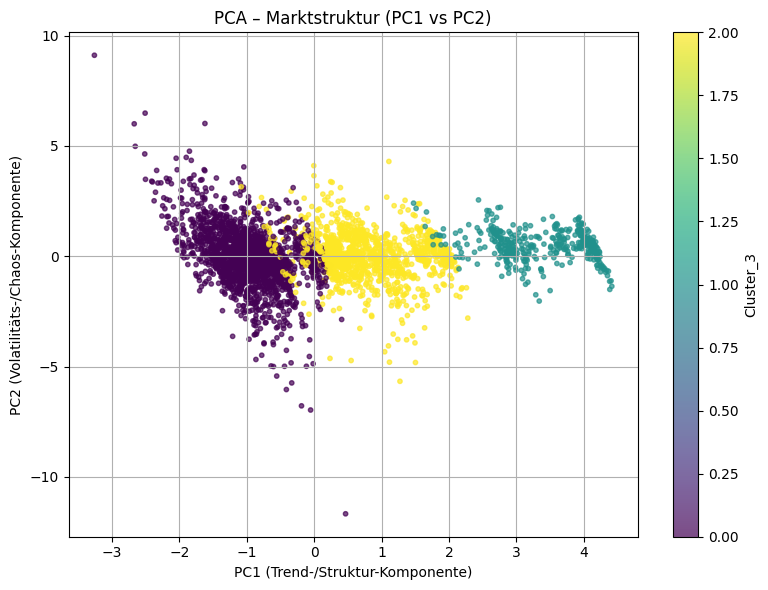

In [ ]:
# ============================================================
# PCA – Visualisierung: PC1 vs PC2 farbig nach Regime
# ============================================================

import matplotlib.pyplot as plt

# Nur Zeilen mit gültigen PC-Werten
df_pca_plot = df_master.dropna(subset=["PC1", "PC2"]).copy()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca_plot["PC1"],
    df_pca_plot["PC2"],
    c=df_pca_plot["Cluster_3"],   # oder Regime farbig (z.B. mit Mapping)
    cmap="viridis",
    alpha=0.7,
    s=10
)

plt.title("PCA – Marktstruktur (PC1 vs PC2)")
plt.xlabel("PC1 (Trend-/Struktur-Komponente)")
plt.ylabel("PC2 (Volatilitäts-/Chaos-Komponente)")
plt.grid(True)
plt.colorbar(scatter, label="Cluster_3")
plt.tight_layout()
plt.show()


In [34]:
display(df_master)


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,...,Direction_Pred,Prob_Up,Signal,Pred_1d,Pred_30d,Pred_365d,Pred_7d,Pred_90d,PC1,PC2
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2025-11-23,84648.609375,88038.468750,84641.773438,86805.007812,58083435576,0.025478,88526.385045,97041.370908,106223.974687,...,0,0.464278,📉 Down,86308.312296,76556.696423,619.604534,85010.366364,71566.211586,4.007662,0.495224
4086,2025-11-24,86798.773438,89206.335938,85272.195312,88270.562500,74433896110,0.016883,87980.197545,96171.039435,105519.116406,...,0,0.45889,📉 Down,87655.141673,79249.343103,619.604534,86469.977933,77065.114841,3.945743,0.604432
4087,2025-11-25,88269.960938,88457.335938,86131.429688,87341.890625,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,...,0,0.484833,📉 Down,87024.440839,77803.737092,618.598941,85779.030196,73989.744982,4.055654,-0.095029
4088,2025-11-26,87345.585938,90581.156250,86316.898438,90518.367188,66496301869,0.036368,87043.824777,94855.701265,104152.243281,...,0,0.441803,📉 Down,89564.377871,81617.563986,619.604534,88383.503894,78600.824509,3.790866,1.229061


In [38]:
# ========================================
# RUNDUNG FÜR STREAMLIT-VISUALISIERUNG
# ========================================

# Preis-Spalten -> 2 Dezimalstellen
price_cols = ["Open", "High", "Low", "Close"]
for col in price_cols:
    if col in df_master.columns:
        df_master[col] = df_master[col].round(2)
        
# Optional: Volume als ganze Zahl (Int) runden, falls es Dezimalstellen hat
if "Volume" in df_master.columns:
    df_master["Volume"] = df_master["Volume"].round(0).astype(int)

# Technische Indikatoren -> 6 Dezimalstellen
indicator_cols = ["Return", "Volatility30", "Momentum7", "MA7", "MA21", "MA50", "MA200"]
for col in indicator_cols:
    if col in df_master.columns:
        # Konvertiere, falls nötig, bevor gerundet wird
        df_master[col] = pd.to_numeric(df_master[col], errors='coerce').round(6) 

# ML-Predictions (Preis) -> 2 Dezimalstellen
pred_cols = [c for c in df_master.columns if c.startswith("Pred_")]
# Konvertiere ganze Spaltengruppe in Float, dann runden
df_master.loc[:, pred_cols] = df_master[pred_cols].apply(pd.to_numeric, errors='coerce').round(2)

# Wahrscheinlichkeiten -> 3 Nachkommastellen
if "Prob_Up" in df_master.columns:
    # 💥 WICHTIGE KORREKTUR: Konvertiere zu Float, BEVOR du rundest.
    df_master["Prob_Up"] = pd.to_numeric(df_master["Prob_Up"], errors='coerce').round(3)

# PCA-Komponenten -> 3 Nachkommastellen
pca_cols = ["PC1", "PC2"]
for col in pca_cols:
    if col in df_master.columns:
        # Konvertiere, falls nötig, bevor gerundet wird
        df_master[col] = pd.to_numeric(df_master[col], errors='coerce').round(3)

print("🎉 Rundung abgeschlossen!")
display(df_master.head())

🎉 Rundung abgeschlossen!


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,...,Direction_Pred,Prob_Up,Signal,Pred_1d,Pred_30d,Pred_365d,Pred_7d,Pred_90d,PC1,PC2
0,2014-09-17,465.86,468.17,452.42,457.33,21056800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.86,456.86,413.10,424.44,34483200,-0.071926,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.10,427.83,384.53,394.80,37919700,-0.069843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.67,423.30,389.88,408.90,36863600,0.035735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.08,412.43,393.18,398.82,26580100,-0.024659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
display(df_master)


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,...,Direction_Pred,Prob_Up,Signal,Pred_1d,Pred_30d,Pred_365d,Pred_7d,Pred_90d,PC1,PC2
0,2014-09-17,465.86,468.17,452.42,457.33,21056800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.86,456.86,413.10,424.44,34483200,-0.071926,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.10,427.83,384.53,394.80,37919700,-0.069843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.67,423.30,389.88,408.90,36863600,0.035735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.08,412.43,393.18,398.82,26580100,-0.024659,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2025-11-23,84648.61,88038.47,84641.77,86805.01,58083435576,0.025478,88526.385045,97041.370908,106223.974688,...,0,0.464,📉 Down,86308.31,76556.70,619.60,85010.37,71566.21,4.008,0.495
4086,2025-11-24,86798.77,89206.34,85272.20,88270.56,74433896110,0.016883,87980.197545,96171.039435,105519.116406,...,0,0.459,📉 Down,87655.14,79249.34,619.60,86469.98,77065.11,3.946,0.604
4087,2025-11-25,88269.96,88457.34,86131.43,87341.89,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,...,0,0.485,📉 Down,87024.44,77803.74,618.60,85779.03,73989.74,4.056,-0.095
4088,2025-11-26,87345.59,90581.16,86316.90,90518.37,66496301869,0.036368,87043.824777,94855.701265,104152.243281,...,0,0.442,📉 Down,89564.38,81617.56,619.60,88383.50,78600.82,3.791,1.229


In [40]:
import os
print("Aktuelles Arbeitsverzeichnis (CWD):", os.getcwd())

Aktuelles Arbeitsverzeichnis (CWD): /Users/burcukiran/Desktop/Abschlussprojekt_Data_Science/notebooks


In [42]:
from pathlib import Path
import pandas as pd # Nur zur Sicherheit, falls es nicht importiert war

# Definieren des Zielordners relativ zum aktuellen Notebook-Pfad
processed_dir = Path("../data/processed") 

# Erstellen des Ordners, falls er nicht existiert
processed_dir.mkdir(parents=True, exist_ok=True)

# Speichern der Datei mit Semikolon als Trennzeichen (sep=';')
# Das ist notwendig, da deutsche/europäische Dezimalzahlen Kommas enthalten können.
df_master.to_csv(processed_dir / "btc_master_view_final.csv", index=False, sep=';')

print("✅ df_master_view_final.csv erfolgreich gespeichert!")

✅ df_master_view_final.csv erfolgreich gespeichert!


In [ ]:
"""
=========================================================
DOKUMENTATION: Was steckt in df_master?
=========================================================

Ziel:
-----
df_master ist unsere "Master-Tabelle" für das Streamlit-Dashboard.
Jede Zeile = ein Tag im Bitcoin-Markt.
Jede Spalte = eine Info über diesen Tag:

- rohe Marktdaten (Preis, Volumen)
- technische Indikatoren (Durchschnitte, Volatilität, Momentum)
- Marktregime (Bull / Bear / Sideways)
- Richtungs-Vorhersage (Up/Down + Wahrscheinlichkeit)
- Preis-Vorhersagen (für 1/7/30/90/365 Tage)
- verdichtete Marktstruktur (PC1, PC2 aus einer PCA)

Die Tabelle kombiniert also klassische Finanzdaten + Machine Learning.

----------------------------------------------------------------------
1. BASIS: ROHE MARKTDATEN
----------------------------------------------------------------------

Diese Spalten kommen direkt aus den historischen Bitcoin-Preisdaten
(btc_clean.csv):

- Date
    * Das Kalenderdatum.
    * Beispiel: "2023-11-01"

- Open (gerundet auf 2 Nachkommastellen)
    * Eröffnungs-Preis des Tages.
    * Beispiel: 29_450.23 USD → so ungefähr hat der Markt den Tag begonnen.

- High
    * Höchster Preis, den Bitcoin an diesem Tag erreicht hat.
    * Beispiel: 30_100.55 USD

- Low
    * Tiefster Preis des Tages.
    * Beispiel: 28_900.10 USD

- Close
    * Schlusskurs des Tages (meist Tagesende / 23:59 UTC).
    * Beispiel: 29_900.75 USD
    * Wichtig für viele Indikatoren und ML-Modelle.

- Volume
    * Gehandeltes Volumen (wie viele BTC/Contracts gehandelt wurden).
    * Beispiel: 1_234_567.00
    * Intuition: Hohe Werte → viel Aktivität im Markt.

----------------------------------------------------------------------
2. TECHNISCHE INDIKATOREN (aus btc_view.csv berechnet)
----------------------------------------------------------------------

Diese Spalten sind abgeleitete Kennzahlen, die den Markt glätten und
Strukturen sichtbar machen – wie Filter über das rohe Rauschen.

- Return
    * Tagesrendite = Prozentänderung des Close-Preises von gestern auf heute.
    * Beispiel: 0.012345 ≈ 1.23 % Anstieg.
    * Bild: Stellt die tägliche "Temperaturänderung" des Preises dar.

- MA7, MA21, MA50, MA200  (Moving Averages)
    * Gleitende Durchschnitte über 7 / 21 / 50 / 200 Tage.
    * Beispiel MA7: Mittelwert der letzten 7 Close-Preise.
    * Intuition:
        - kurze MAs (7, 21) reagieren schnell → kurzfristiger Trend
        - lange MAs (50, 200) reagieren langsam → langfristiger Trend
    * Beispiel: MA50 = 28_500.12 → Durchschnittspreis der letzten 50 Tage.

- Volatility30
    * Schwankungsstärke der letzten 30 Tage.
    * Formal: Standardabweichung der Returns über 30 Tage.
    * Beispiel: 0.045 → ca. 4,5 % typische Tagesbewegung.
    * Bild: Je größer dieser Wert, desto "zappeliger" ist der Markt.

- Momentum7
    * Vereinfacht: Wie stark ist der Preis in den letzten 7 Tagen gestiegen
      oder gefallen?
    * Beispiel: 0.18 → eher positives Momentum (Preis hat "Rückenwind").

----------------------------------------------------------------------
3. REGIME / CLUSTER (Marktphasen)
----------------------------------------------------------------------

Diese Spalten stammen aus dem Clustering-Notebook
(03_clustering_market_regimes.ipynb).
Dort haben wir ein ML-Modell (z.B. KMeans mit 3 Clustern) auf die
Indikatoren angewendet, um typische Marktphasen zu finden.

- Cluster_3
    * Nummer des Clusters (0, 1, 2).
    * Diese Zahl allein ist uninteressant – sie ist nur eine ID.
    * Beispiel:
        - 0.0 → später als "Bear" benannt
        - 1.0 → später als "Sideways"
        - 2.0 → später als "Bull"

- Regime
    * Menschlich lesbare Version von Cluster_3.
    * Mapping in etwa:
        - Cluster 0 → "Bear"   (fallender Markt)
        - Cluster 1 → "Sideways" (Seitwärts / unentschlossen)
        - Cluster 2 → "Bull"   (steigender Markt)
    * Beispiel:
        - Regime = "Bull" bedeutet:
            Markt ist tendenziell steigend, Momentum & MAs sind eher positiv,
            Volatilität moderat.

Bild dazu:
-----------
Stell dir vor, du sortierst Musik nach Stimmung:
- Cluster 0 → traurige Songs
- Cluster 1 → neutrale Songs
- Cluster 2 → Partymusik
Regime ist dann das "Label" (Traurig/Neutral/Party), das wir später anzeigen.

----------------------------------------------------------------------
4. DIRECTION MODEL (Up/Down-Vorhersage)
----------------------------------------------------------------------

Diese Spalten stammen aus dem Direction-Notebook
(02_direction_models.ipynb).  
Das Modell, das wir verwenden, ist:

    Logistic Regression  →  direction_LogisticRegression.joblib

Es sagt für jeden Tag:
- Wird der Preis morgen eher steigen (Up = 1)?
- oder fallen (Down = 0)?

Verwendete Features (Eingaben fürs Modell):
-------------------------------------------
['Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50',
 'MA200', 'Volatility30', 'Momentum7']

Also: Preis, Volumen, kurzfristige / langfristige Durchschnitte,
Volatilität und Momentum.

Spalten:

- Direction_Pred
    * 1 bedeutet: Modell erwartet, dass der Preis morgen steigt ("Up").
    * 0 bedeutet: Modell erwartet, dass der Preis morgen fällt ("Down").
    * Beispiel:
        - Direction_Pred = 1 → "Morgen eher steigender Markt."

- Prob_Up
    * Wahrscheinlichkeit, dass der Markt morgen steigt – laut Modell.
    * Kommt aus model.predict_proba(...), Spalte für Klasse "1" (Up).
    * Beispiel:
        - Prob_Up = 0.73 → Modell sieht 73 % Chance auf steigenden Preis.

- Signal
    * Menschliche Version von Direction_Pred:
        - 1 → "Up"
        - 0 → "Down"
    * Teilweise mit Emoji oder Icon, je nach Darstellung in Streamlit.

Bild dazu:
-----------
Stell dir eine Wetter-App vor:

- Direction_Pred = 1  → morgen "Sonne"
- Prob_Up = 0.73      → 73 % Regenwahrscheinlichkeit … äh, hier: 73 % Up-Chance.
- Signal = "Up"       → das Icon, das du im UI siehst (Sonne/Wolke).

----------------------------------------------------------------------
5. PRICE-PREDICTIONS (Vorhersagen für zukünftige Preise)
----------------------------------------------------------------------

Diese Spalten stammen aus dem Notebook 04_regression_price.ipynb.

Dort haben wir für verschiedene Zeithorizonte (1, 7, 30, 90, 365 Tage)
jeweils mehrere Regressionsmodelle trainiert (ridge, elasticnet, random_forest …)
und anschließend pro Horizont das beste ML-Modell nach RMSE gewählt
(naive Baseline wurde bewusst ausgeschlossen).

Ergebnis der Modellwahl (Beispiel aus deinem Projekt):

- 1d:    ridge
- 7d:    ridge
- 30d:   elasticnet
- 90d:   elasticnet
- 365d:  random_forest

Alle Modelle verwenden ähnliche Features wie das Direction-Modell
(Preis, MAs, Volatilität, Momentum etc.).

Spalten:

- Pred_1d
    * Modell: ridge (1-Tages-Horizont)
    * Schätzung des Bitcoin-Schlusskurses in **1 Tag**.
    * Beispiel:
        - Close heute:   29_900.00
        - Pred_1d:       30_200.50
        → Modell glaubt: in 1 Tag eher leicht höherer Preis.

- Pred_7d
    * Modell: ridge (7-Tages-Horizont)
    * Schätzung des Schlusskurses in **7 Tagen**.
    * Beispiel:
        - Pred_7d = 31_500.00 → Preis in einer Woche wird ca. dort erwartet.

- Pred_30d
    * Modell: elasticnet
    * Schätzung des Schlusskurses in **30 Tagen**.

- Pred_90d
    * Modell: elasticnet
    * Schätzung des Schlusskurses in **90 Tagen**.

- Pred_365d
    * Modell: random_forest
    * Schätzung des Schlusskurses in **365 Tagen** (1 Jahr).

Bild dazu:
-----------
Stell dir vor, du fragst fünf verschiedene Expert:innen:

- "Wo steht Bitcoin morgen / in einer Woche / in einem Monat / …?"

Jeder Horizont hat seinen eigenen Experten (sein eigenes ML-Modell),
das auf Basis der letzten Marktstruktur einen Wahrscheinlichkeits-Preis
ausspuckt.

----------------------------------------------------------------------
6. PCA – MARKTSTRUKTUR ALS SMOOTHIE (PC1, PC2)
----------------------------------------------------------------------

Hier kommt der Smoothie!

Wir haben mehrere Indikatoren verwendet, z.B.:

    PCA-Features = ['Return', 'Volatility30', 'Momentum7', 'MA50', 'MA200']

Problem:
- Das sind viele Zahlen, die zusammenhängen.
- Schwer zu sehen, "wie der Markt insgesamt drauf ist".

Lösung:
- PCA (Principal Component Analysis) fasst diese vielen Zutaten
  zu wenigen "Haupt-Komponenten" zusammen:
    → PC1, PC2

Analogien:
----------

- Zutaten = Return, Volatilität, Momentum, MAs
- Mixer = PCA
- Smoothie 1 = PC1 (Trend/Struktur)
- Smoothie 2 = PC2 (Chaos/Volatilität)

Wichtig:
- PCA ist **keine** Prognose, sondern eine Art Kamera, die den Markt in
  2D projiziert, damit wir Cluster/Regimes visuell besser sehen können.

Spalten:

- PC1
    * Mischung aus unseren Features, so gewählt, dass sie möglichst viel
      der Variation erklärt (erste Hauptkomponente).
    * Intuition:
        - Hoher PC1 → typischerweise bullische Struktur
          (Preis über MAs, Momentum positiv)
        - Niedriger PC1 → eher bearishe Struktur
          (Preis unter MAs, negative Tendenz)
    * Beispiel:
        - PC1 = +2.3 → Markt ist stark im "Trendmodus" (oft Bull)
        - PC1 = −1.5 → Markt eher schwach / unter Druck.

- PC2
    * Zweite Hauptkomponente, orthogonal zu PC1.
    * Intuition:
        - fängt oft die Volatilität / "Chaos"-Dimension ein:
          wie nervös ist der Markt in dieser Struktur?
    * Beispiel:
        - PC2 = +3.0 → sehr turbulente Phase (viele starke Ausschläge)
        - PC2 =  0.1 → ruhige Phase.

Bild dazu:
-----------
Stell dir vor, du zeichnest jeden Tag als Punkt in einem Diagramm:

- x-Achse: PC1  (Trendstruktur)
- y-Achse: PC2  (Chaos/Volatilität)

Die Punkte bilden farbige Wolken (Cluster → Regime).
So siehst du auf einen Blick:
"Ah, hier sind die Bull-Phasen, da die Bärenmärkte, und hier das Seitwärts-Gedöns."

----------------------------------------------------------------------
7. RUNDUNG / DARSTELLUNG
----------------------------------------------------------------------

Damit die Tabelle in Streamlit gut lesbar ist:

- Preise & Predictions werden auf 2 Dezimalstellen gerundet.
- Indikatoren wie Return, Volatility, Momentum auf 6 Dezimalstellen.
- Wahrscheinlichkeiten (Prob_Up) auf 3 Dezimalstellen.
- PC1/PC2 auf 3 Dezimalstellen.

Das ändert nichts am Modell – nur die Anzeige.
Wie bei einem Thermometer: Die Temperatur ist die gleiche,
egal ob du 21.437 °C oder 21.4 °C anzeigst.

----------------------------------------------------------------------
8. ZUSAMMENFASSUNG
----------------------------------------------------------------------

df_master ist damit:

- ein Zeilen-weise vollständiger "Tages-Steckbrief" für Bitcoin:
    - Was war der Preis?
    - In welcher Marktphase waren wir (Regime)?
    - Was sagt das Up/Down-Modell?
    - Wie hoch ist die Up-Wahrscheinlichkeit?
    - Wo könnten die Preise in 1/7/30/90/365 Tagen liegen?
    - In welcher strukturellen Ecke des Marktes stehen wir (PC1/PC2)?

- und gleichzeitig die Datenbasis für dein Dashboard:
    - Tabellenansichten (DataFrames)
    - Plots mit Regimen / PCA / Predictions
    - Signale ("Up"/"Down") für einfache Interpretation.
"""

# Optional: eine Python-Struktur mit Kurz-Beschreibungen je Spalte
df_master_description = {
    "Date": "Kalenderdatum.",
    "Open": "Eröffnungs-Preis des Tages.",
    "High": "Tageshoch.",
    "Low": "Tagestief.",
    "Close": "Schlusskurs des Tages.",
    "Volume": "Gehandeltes Volumen.",
    "Return": "Tagesrendite in Dezimalform (z.B. 0.01 = 1%).",
    "MA7": "Gleitender Durchschnitt der letzten 7 Tage.",
    "MA21": "Gleitender Durchschnitt der letzten 21 Tage.",
    "MA50": "Gleitender Durchschnitt der letzten 50 Tage.",
    "MA200": "Gleitender Durchschnitt der letzten 200 Tage.",
    "Volatility30": "Volatilität (Schwankung) über die letzten 30 Tage.",
    "Momentum7": "Kurzfristiges Momentum der letzten 7 Tage.",
    "Cluster_3": "Cluster-ID des Marktregimes (0,1,2).",
    "Regime": "Marktphase: 'Bull', 'Bear' oder 'Sideways'.",
    "Direction_Pred": "0=Down, 1=Up – Vorhersage des Logistic-Regression-Modells.",
    "Prob_Up": "Wahrscheinlichkeit für 'Up' laut Direction-Modell.",
    "Signal": "Lesbare Version der Direction_Pred ('Up'/'Down').",
    "Pred_1d": "Preisvorhersage für den nächsten Tag (ridge-Regression).",
    "Pred_7d": "Preisvorhersage in 7 Tagen (ridge-Regression).",
    "Pred_30d": "Preisvorhersage in 30 Tagen (elasticnet-Regression).",
    "Pred_90d": "Preisvorhersage in 90 Tagen (elasticnet-Regression).",
    "Pred_365d": "Preisvorhersage in 365 Tagen (random-forest-Regression).",
    "PC1": "Erste PCA-Komponente (Trend/Struktur-Smoothie).",
    "PC2": "Zweite PCA-Komponente (Volatilitäts/Chaos-Smoothie).",
}

# Wenn du möchtest, kannst du z.B. so eine kleine Übersicht ausgeben:
for col, desc in df_master_description.items():
    if col in df_master.columns:
        print(f"{col:>10s} : {desc}")


      Date : Kalenderdatum.
      Open : Eröffnungs-Preis des Tages.
      High : Tageshoch.
       Low : Tagestief.
     Close : Schlusskurs des Tages.
    Volume : Gehandeltes Volumen.
    Return : Tagesrendite in Dezimalform (z.B. 0.01 = 1%).
       MA7 : Gleitender Durchschnitt der letzten 7 Tage.
      MA21 : Gleitender Durchschnitt der letzten 21 Tage.
      MA50 : Gleitender Durchschnitt der letzten 50 Tage.
     MA200 : Gleitender Durchschnitt der letzten 200 Tage.
Volatility30 : Volatilität (Schwankung) über die letzten 30 Tage.
 Momentum7 : Kurzfristiges Momentum der letzten 7 Tage.
 Cluster_3 : Cluster-ID des Marktregimes (0,1,2).
    Regime : Marktphase: 'Bull', 'Bear' oder 'Sideways'.
Direction_Pred : 0=Down, 1=Up – Vorhersage des Logistic-Regression-Modells.
   Prob_Up : Wahrscheinlichkeit für 'Up' laut Direction-Modell.
    Signal : Lesbare Version der Direction_Pred ('Up'/'Down').
   Pred_1d : Preisvorhersage für den nächsten Tag (ridge-Regression).
   Pred_7d : Preisvo